In [2]:
import numpy as np
import seaborn as sns
import cvxpy as cp
import matplotlib.pyplot as plt

In [3]:
number_of_observations =  252 * 10000  # number of observations, daily returns * 6 months, with 252 * 100000, my mac dies

In [4]:
risk_parameter = .5

def find_markowitz_weights(expected_returns, covariance_matrix, risk_parameter):
    # Set ut the problem
    n = len(expected_returns)
    weights = cp.Variable(n)
    objective = cp.matmul(expected_returns, weights) - risk_parameter * cp.quad_form(weights, covariance_matrix)
    constraints = [cp.sum(weights) == 1] # allow shorting
    # constraints = [cp.sum(weights) == 1, weights >= 0] # allow shorting
    prob = cp.Problem(cp.Maximize(objective), constraints)

    # Solving the problem
    prob.solve()
    return weights.value

In [5]:
number_of_stocks = 100
def find_markowitz_weights_with_given_number_of_observations(number_of_observations):
    all_returns = .1 * np.random.randn(number_of_stocks, number_of_observations) # .1 is so that all have sigma = .1
    estimated_returns = all_returns.mean(axis=1)
    estimated_covariance = np.cov(all_returns)
    return find_markowitz_weights(estimated_returns, estimated_covariance, risk_parameter=.5)

0.009135122011004877


Text(0, 0.5, 'Portolio Allocation')

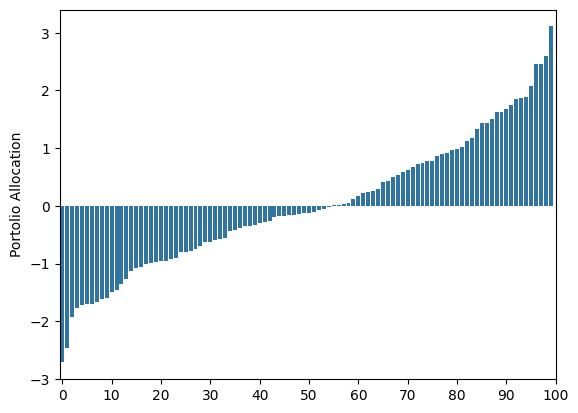

In [22]:
markowitz_portfolio_1_years = find_markowitz_weights_with_given_number_of_observations(252 * 1)
ax = sns.barplot(sorted(markowitz_portfolio_1_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")


0.010076256788208641


Text(0, 0.5, 'Portolio Allocation')

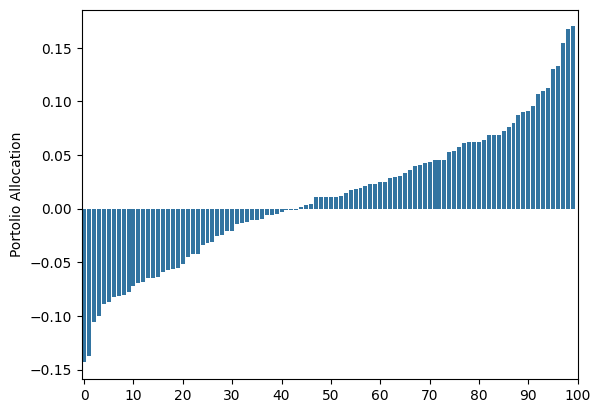

In [23]:
markowitz_portfolio_100_years = find_markowitz_weights_with_given_number_of_observations(252 * 100)
ax = sns.barplot(sorted(markowitz_portfolio_100_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")

0.00999465392137217


Text(0, 0.5, 'Portolio Allocation')

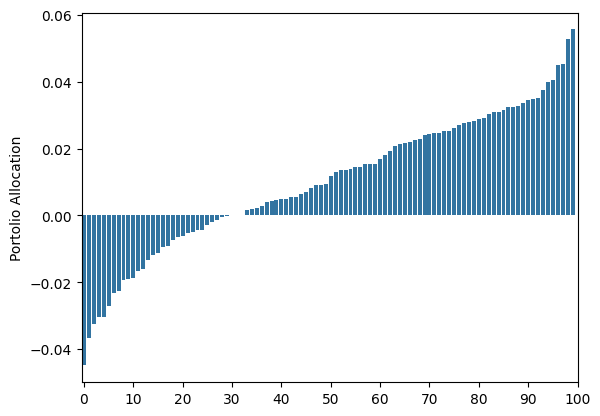

In [24]:
markowitz_portfolio_1000_years = find_markowitz_weights_with_given_number_of_observations(252 * 1000)
ax = sns.barplot(sorted(markowitz_portfolio_1000_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")

0.009988442693565688


Text(0, 0.5, 'Portolio Allocation')

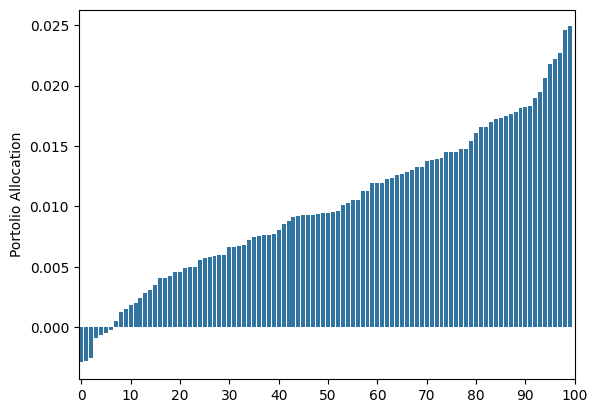

In [25]:
markowitz_portfolio_10000_years = find_markowitz_weights_with_given_number_of_observations(252 * 10000)
ax = sns.barplot(sorted(markowitz_portfolio_10000_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")

0.009992115154007435


Text(0, 0.5, 'Portolio Allocation')

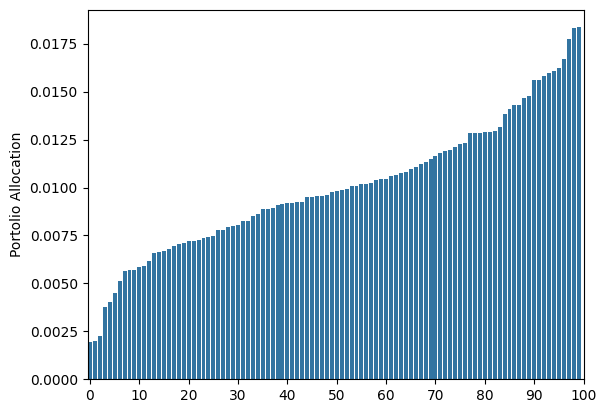

In [26]:
markowitz_portfolio_25000_years = find_markowitz_weights_with_given_number_of_observations(252 * 25000)
ax = sns.barplot(sorted(markowitz_portfolio_25000_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")

In [12]:
# misallocation_plots don't really give us a good sense of how bad the allocation is.
# to get a better idea plot the wealth trajectories of the portfolios through time. They should track the equal weights one to be considered good.

Text(0.5, 0, 'Time step')

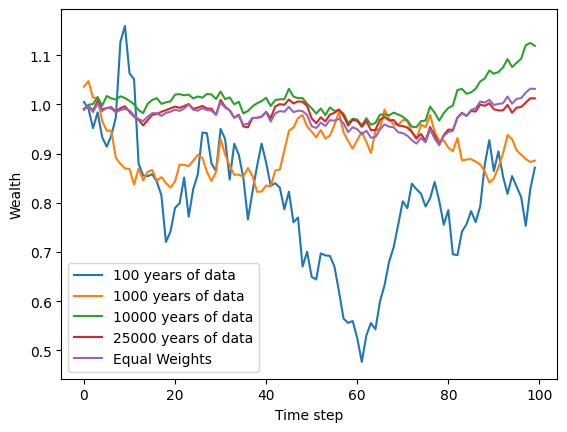

In [30]:
# for _ in range(10):
more_returns = 1 + .1 * np.random.randn(number_of_stocks, 100)
wealth_trajectory_100_years = np.maximum((markowitz_portfolio_100_years.T @ more_returns), 0).cumprod()
wealth_trajectory_1000_years = np.maximum(markowitz_portfolio_1000_years.T @ more_returns, 0).cumprod()
wealth_trajectory_10000_years = np.maximum((markowitz_portfolio_10000_years.T @ more_returns),0).cumprod()
wealth_trajectory_25000_years = np.maximum((markowitz_portfolio_25000_years.T @ more_returns),0).cumprod()
equal_sizing_wealth_trajectory = np.maximum(((1.0/100. * np.ones(100)).T @ more_returns), 0).cumprod()
sns.lineplot(wealth_trajectory_100_years, label="100 years of data")
sns.lineplot(wealth_trajectory_1000_years, label="1000 years of data")
sns.lineplot(wealth_trajectory_10000_years, label ="10000 years of data")
sns.lineplot(wealth_trajectory_25000_years, label ="25000 years of data")
sns.lineplot(equal_sizing_wealth_trajectory, label="Equal Weights")
plt.ylabel("Wealth")
plt.xlabel("Time step")

In [12]:
# What if we estimate only means and assume covariance in given. What about the other way?

In [13]:
number_of_stocks = 100
def find_markowitz_weights_with_given_number_of_observations_known_covariance(number_of_observations):
    all_returns = .1 * np.random.randn(number_of_stocks, number_of_observations) # .1 is so that all have sigma = .1
    estimated_returns = all_returns.mean(axis=1)
    true_covariance = np.eye(all_returns.shape[0])
    return find_markowitz_weights(estimated_returns, true_covariance, risk_parameter=.5)

Text(0, 0.5, 'Portolio Allocation')

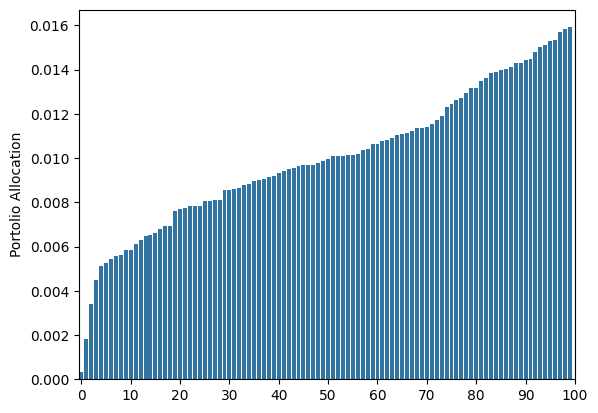

In [31]:
markowitz_portfolio_known_covariance_4_years = find_markowitz_weights_with_given_number_of_observations_known_covariance(252 * 4)
ax = sns.barplot(sorted(markowitz_portfolio_known_covariance_4_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")

In [33]:
number_of_stocks = 100
def find_markowitz_weights_with_true_mean_returns_given_number_of_observations(number_of_observations):
    all_returns = .1 * np.random.randn(number_of_stocks, number_of_observations) # .1 is so that all have sigma = .1
    true_returns = np.zeros(number_of_stocks)
    estimated_covariance = np.cov(all_returns)
    print(estimated_covariance[0][0])
    return find_markowitz_weights(true_returns, estimated_covariance, risk_parameter=.5)

0.010275700718984869


Text(0, 0.5, 'Portolio Allocation')

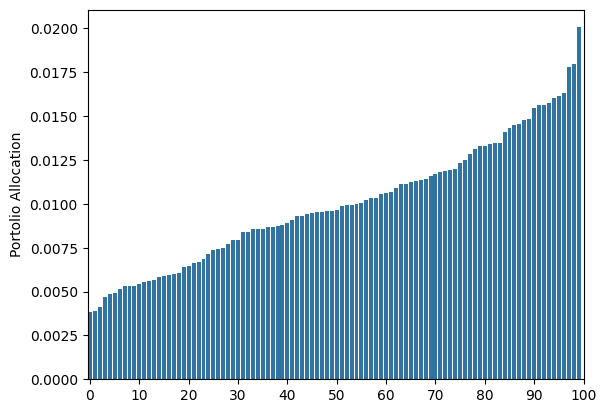

In [35]:
markowitz_portfolio_known_mean_returns_4_years = find_markowitz_weights_with_true_mean_returns_given_number_of_observations(252 * 4)
ax = sns.barplot(sorted(markowitz_portfolio_known_mean_returns_4_years))
ax.set_xticks(range(0, len(ax.get_xticklabels()) + 1, len(ax.get_xticklabels()) // 10 ))
ax.set_xticklabels(range(0, 101, 10));
plt.ylabel("Portolio Allocation")